Date: 01 April 2025

Name: Divyanshu Singh

Reg No: 22MIS1150

Topic: K Clustering Algo


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.105

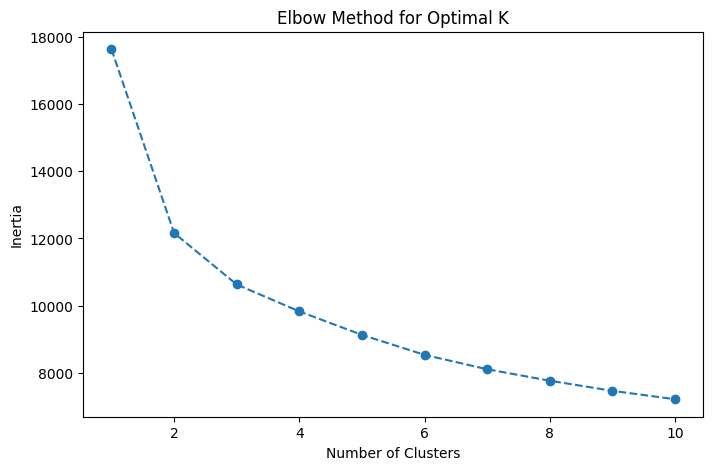

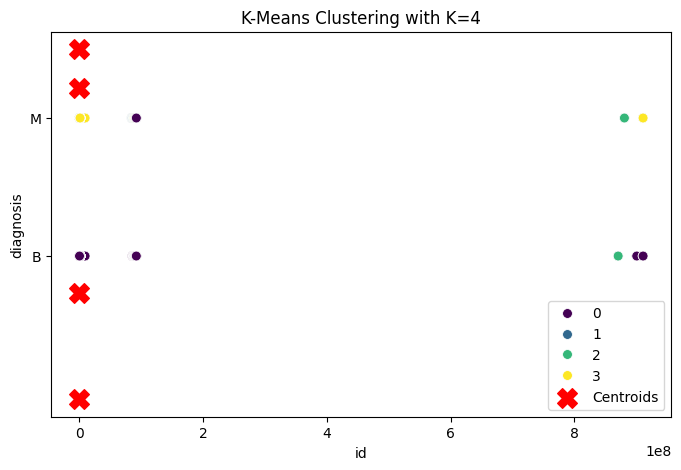

Clustered dataset saved in Google Drive as clustered_dataset.csv


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import drive


drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML LAB DATASETs/KNNAlgorithmDataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
print("Dataset Preview:")
print(df.head())

# Remove the empty column
df.drop(columns=['Unnamed: 32'], errors='ignore', inplace=True)

# Handle missing values separately for numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())  # Fill numerical columns with mean

# Select relevant features for clustering (modify column names as per your dataset)
features = df[num_cols]

# Ensure features are not empty
if features.empty:
    raise ValueError("No numeric features available after processing. Check dataset preprocessing.")

# Standardize the dataset
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with optimal K (Choose manually based on elbow curve)
k_optimal = 4  # Adjust based on elbow curve
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing the clusters (Modify feature names as needed)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.title(f'K-Means Clustering with K={k_optimal}')
plt.show()

# Save the dataset with cluster labels
df.to_csv("/content/drive/My Drive/clustered_dataset.csv", index=False)
print("Clustered dataset saved in Google Drive as clustered_dataset.csv")